In [133]:
import numpy as np

!pip install matplotlib

import matplotlib.pyplot as plt

     |████████████████████████████████| 10.3 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 10.1 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lime 0.2.0.1 requires scikit-image>=0.12, which is not installed.


In [39]:
def merge(a,b,idx=0):
    i=0;j=0;
    out=[[0]*len(a[0])]*(len(a)+len(b))
    
    for k in range(0,len(a)+len(b)-1):
        if i==len(a) and (j+1)<len(b):
            out[k]=b[j]
            j+=1
        elif j==len(b) and (i+1)<len(a):
            out[k]=a[i]
            i+=1
        elif a[i][idx]<b[j][idx]:
            out[k]=a[i]
            i+=1
        elif b[j][idx]<=a[i][idx]:
            out[k]=b[j]
            j+=1
    
    if a[-1][idx]>=b[-1][idx]:
        out[-1]=a[-1]
    else:
        out[-1]=b[-1]

    return out        

def mergeSort(a,idx=0):
    left = a[0:len(a)//2]
    right = a[len(a)//2:]
    
    if len(left)==1:
        if len(right)==1:
            pass
        else:
            if right[0][idx]<=right[1][idx]:
                pass
            else:
                right = [right[1],right[0]]
                
        return merge(left,right,idx) 
    
    if len(right)==1:
        if len(left)==1:
            pass
        else:
            if left[0][idx]<=left[1][idx]:
                pass
            else:
                left = [left[1],left[0]]            
            
        return merge(left,right,idx)                 

    else:

        return merge(mergeSort(left,idx),mergeSort(right,idx),idx)

In [151]:
a=[[-1,0],[1,0],[0,-1],[0,1],[-0.1,0.1],[0.1,-0.1],[0.5,0.5],[-0.5,-0.5]]

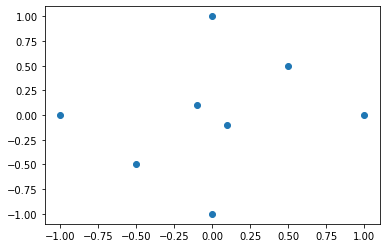

In [152]:
plt.scatter([p[0] for p in a],[p[1] for p in a])
plt.show()

In [153]:
print(mergeSort(a,1))

[[0, -1], [-0.5, -0.5], [0.1, -0.1], [1, 0], [-1, 0], [-0.1, 0.1], [0.5, 0.5], [0, 1]]


In [154]:
print(mergeSort(a,0))

[[-1, 0], [-0.5, -0.5], [-0.1, 0.1], [0, 1], [0, -1], [0.1, -0.1], [0.5, 0.5], [1, 0]]


In [155]:
def distance(p1,p2):
    d = [(p1[k]-p2[k])**2 for k in range(len(p1))]
    d = sum(d)**5
    return d    

In [166]:
def best_pair(pairs):
    distances = [distance(p[0],p[1]) for p in pairs if len(p) > 0]
    return pairs[distances.index(min(distances))]

In [167]:
def brute_force(a,b):
    distances = {}
    for i in range(len(a)):
        for j in range(len(b)):
            p1 = a[i]
            p2 = b[j]
            if p1 == p2:
                pass
            else:
                distances[distance(p1,p2)] = [p1,p2]
    return sorted(distances.items())[0][1]

In [218]:
def split_coords(a,mid):
    left = []
    right = []
    for p in a:
        if p[0] <= mid and (len(left) < len(a)//2):
            left.append(p)
        else:
            right.append(p)
    return left,right        

In [219]:
brute_force(a,a)

[[0.1, -0.1], [-0.1, 0.1]]

In [220]:
def closestSplitPair(Px,Py,delta):
    x_bar = Px[len(Px)//2][0]   
    Sy = [p for p in Py if x_bar - delta <= p[0] <= x_bar + delta]
    best_points = []
    best = delta
    for i in range(len(Sy)):
        for j in range(i+1,min((7,len(Sy)))):
            p1 = Sy[i]
            p2 = Sy[j]
            if distance(p1,p2) < best:
                best_points = [p1,p2]
                best = distance(p1,p2)
    return best_points            
    

In [225]:
def closestPair(Px,Py):
    
    if len(Px)<=3:
        return brute_force(Px,Py)
    
    else:
        
        Qx = Px[:len(Px)//2]
        Rx = Px[len(Px)//2:]
        #Qy,Ry = split_coords(Py,Qx[-1][0])
        
        Qy = Py[:len(Py)//2]
        Ry = Py[len(Py)//2:]
        
        print("Qx: ",Qx)
        print("Qy: ",Qy)
        print("Rx: ",Rx)
        print("Ry: ",Ry)
        
        cpQ = closestPair(Qx,Qy)
        cpR = closestPair(Rx,Ry)
        delta = min((distance(cpQ[0],cpQ[1]),distance(cpR[0],cpR[1])))
        cp_split = closestSplitPair(Px,Py,delta)
        #return best_pair([cpQ,cpR,cp_split])
        return best_pair([cpQ,cpR])
        
    

In [226]:
closestPair(mergeSort(a,0),mergeSort(a,1))

Qx:  [[-1, 0], [-0.5, -0.5], [-0.1, 0.1], [0, 1]]
Qy:  [[0, -1], [-0.5, -0.5], [0.1, -0.1], [1, 0]]
Rx:  [[0, -1], [0.1, -0.1], [0.5, 0.5], [1, 0]]
Ry:  [[-1, 0], [-0.1, 0.1], [0.5, 0.5], [0, 1]]
Qx:  [[-1, 0], [-0.5, -0.5]]
Qy:  [[0, -1], [-0.5, -0.5]]
Rx:  [[-0.1, 0.1], [0, 1]]
Ry:  [[0.1, -0.1], [1, 0]]
Qx:  [[0, -1], [0.1, -0.1]]
Qy:  [[-1, 0], [-0.1, 0.1]]
Rx:  [[0.5, 0.5], [1, 0]]
Ry:  [[0.5, 0.5], [0, 1]]


[[-0.1, 0.1], [0.1, -0.1]]